In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
# Read in training times with most basic settings (Linear measurement process, Gaussian noise, no heteroskedasticity)
no_norm_seq_linear_Gaussian_0_training_time = pd.read_table("no_norm_seq_linear_Gaussian_0_training_time.tsv", index_col = "Experiment")
no_norm_seq_linear_Gaussian_0_training_time.rename({"Training time": "Linear"}, axis = 1, inplace = True)
no_norm_seq_linear_Gaussian_0_training_time

Linear
Experiment           
RNCMPT00100  322.0164
RNCMPT00101  626.7810
RNCMPT00102  394.4619
RNCMPT00103  496.1342
RNCMPT00104  618.5032
...               ...
RNCMPT00095  603.1157
RNCMPT00096  343.8218
RNCMPT00097  479.2375
RNCMPT00099  441.8883
RNCMPT00009  250.8041

[244 rows x 1 columns]

In [3]:
# Read in training times with nonlinear measurement process, Gaussian noise and no heteroskedasticity
no_norm_seq_non_linear_Gaussian_0_training_time = pd.read_table("no_norm_seq_non-linear_Gaussian_0_training_time.tsv", index_col = "Experiment")
no_norm_seq_non_linear_Gaussian_0_training_time.rename({"Training time": "Nonlinear"}, axis = 1, inplace = True)
no_norm_seq_non_linear_Gaussian_0_training_time

Nonlinear
Experiment            
RNCMPT00100   495.3080
RNCMPT00101   615.7560
RNCMPT00102   370.5002
RNCMPT00103   613.9492
RNCMPT00104   470.6880
...                ...
RNCMPT00095   542.7679
RNCMPT00096   619.9598
RNCMPT00097   612.6378
RNCMPT00099   619.0716
RNCMPT00009   257.8174

[244 rows x 1 columns]

In [4]:
# Merge data frames
nonlinearity_training_times = no_norm_seq_linear_Gaussian_0_training_time.merge(no_norm_seq_non_linear_Gaussian_0_training_time, left_index = True, right_index = True)
nonlinearity_training_times                                                                           

Linear  Nonlinear
Experiment                      
RNCMPT00100  322.0164   495.3080
RNCMPT00101  626.7810   615.7560
RNCMPT00102  394.4619   370.5002
RNCMPT00103  496.1342   613.9492
RNCMPT00104  618.5032   470.6880
...               ...        ...
RNCMPT00095  603.1157   542.7679
RNCMPT00096  343.8218   619.9598
RNCMPT00097  479.2375   612.6378
RNCMPT00099  441.8883   619.0716
RNCMPT00009  250.8041   257.8174

[244 rows x 2 columns]

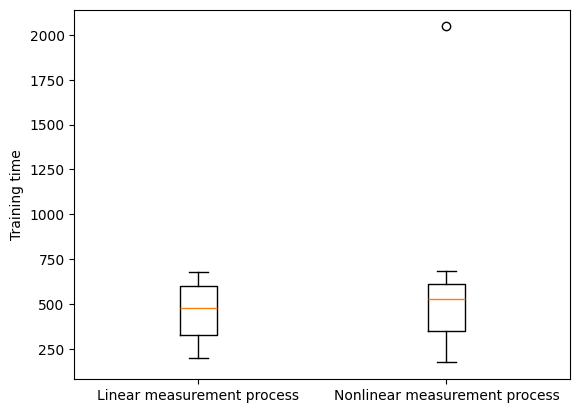

In [5]:
# Plot training times
plt.boxplot(nonlinearity_training_times, labels = ["Linear measurement process", "Nonlinear measurement process"])
plt.ylabel("Training time")
plt.show()

In [6]:
scipy.stats.ttest_ind(nonlinearity_training_times["Linear"], nonlinearity_training_times["Nonlinear"])

TtestResult(statistic=-2.2605992071032306, pvalue=0.024225642119138555, df=486.0)

In [7]:
# Read in performance results for linear vs. nonlinear comparison
no_norm_seq_linear_Gaussian_0_performance = pd.read_table("no_norm_seq_linear_Gaussian_0_performance.tsv", index_col = "Experiment")
no_norm_seq_linear_Gaussian_0_performance.rename({"Pearson score": "Linear"}, axis = 1, inplace = True)
no_norm_seq_non_linear_Gaussian_0_performance = pd.read_table("no_norm_seq_non-linear_Gaussian_0_performance.tsv", index_col = "Experiment")
no_norm_seq_non_linear_Gaussian_0_performance.rename({"Pearson score": "Nonlinear"}, axis = 1, inplace = True)
nonlinearity_performances = no_norm_seq_linear_Gaussian_0_performance.merge(no_norm_seq_non_linear_Gaussian_0_performance, left_index = True, right_index = True)
nonlinearity_performances

Linear  Nonlinear
Experiment                    
RNCMPT00100  0.7231     0.7524
RNCMPT00101  0.5692     0.5927
RNCMPT00102  0.0604     0.0907
RNCMPT00103  0.4219     0.3982
RNCMPT00104  0.2658     0.3221
...             ...        ...
RNCMPT00095  0.1277     0.1486
RNCMPT00096  0.6147     0.5717
RNCMPT00097  0.6315     0.6646
RNCMPT00099  0.7445     0.7417
RNCMPT00009  0.5001     0.5027

[244 rows x 2 columns]

In [8]:
# Plot performance with linear vs nonlinear measurement processes
plt.boxplot(nonlinearity_performances, labels = ["Linear measurement process", "Nonlinear measurement process"])
plt.ylabel("Predicted vs observed Pearson correlation")
plt.show()

In [9]:
scipy.stats.ttest_ind(nonlinearity_performances["Linear"], nonlinearity_performances["Nonlinear"])

TtestResult(statistic=-0.21791112365207174, pvalue=0.8275898226654639, df=486.0)

In [10]:
# Read in training times of linear Gaussian measurement processes with heteroskedasticity orders 0, 1, and 2
no_norm_seq_linear_Gaussian_0_training_time = pd.read_table("no_norm_seq_train_rnacompete_2013_GE.py_linear_Gaussian_0_training_time.tsv", index_col = "Experiment")
no_norm_seq_linear_Gaussian_0_training_time.rename({"Training time": "Heteroskedasticity\n order 0"}, axis = 1, inplace = True)
no_norm_seq_linear_Gaussian_1_training_time = pd.read_table("no_norm_seq_train_rnacompete_2013_GE.py_linear_Gaussian_1_training_time.tsv", index_col = "Experiment")
no_norm_seq_linear_Gaussian_1_training_time.rename({"Training time": "Heteroskedasticity\n order 1"}, axis = 1, inplace = True)
no_norm_seq_linear_Gaussian_2_training_time = pd.read_table("no_norm_seq_train_rnacompete_2013_GE.py_linear_Gaussian_2_training_time.tsv", index_col = "Experiment")
no_norm_seq_linear_Gaussian_2_training_time.rename({"Training time": "Heteroskedasticity\n order 2"}, axis = 1, inplace = True)
heteroskedasticity_training_times = no_norm_seq_linear_Gaussian_0_training_time.merge(no_norm_seq_linear_Gaussian_1_training_time, left_index = True, right_index = True)
heteroskedasticity_training_times = heteroskedasticity_training_times.merge(no_norm_seq_linear_Gaussian_2_training_time, left_index = True, right_index = True)
heteroskedasticity_training_times

Heteroskedasticity\n order 0  Heteroskedasticity\n order 1  \
Experiment                                                                
RNCMPT00100                      540.1270                      629.6154   
RNCMPT00101                      636.8994                      631.6341   
RNCMPT00102                      393.7725                      376.5466   
RNCMPT00103                      534.4518                      622.6427   
RNCMPT00104                      621.7416                      522.5301   
...                                   ...                           ...   
RNCMPT00095                      838.6332                      635.1675   
RNCMPT00096                      436.3951                      644.1485   
RNCMPT00097                      596.6411                      626.6352   
RNCMPT00099                      957.2006                      621.7363   
RNCMPT00009                      389.4892                      234.8946   

             Heteroskedasticity\n order 2  
Experiment                                 
RNCMPT00100                      635.6606  
RNCMPT00101                      627.0735  
RNCMPT00102                      608.5623  
RNCMPT00103                      611.0980  
RNCMPT00104                      610.3646  
...                                   ...  
RNCMPT00095                      621.9608  
RNCMPT00096                      642.8443  
RNCMPT00097                      620.9684  
RNCMPT00099                      401.6329  
RNCMPT00009                      291.3333  

[244 rows x 3 columns]

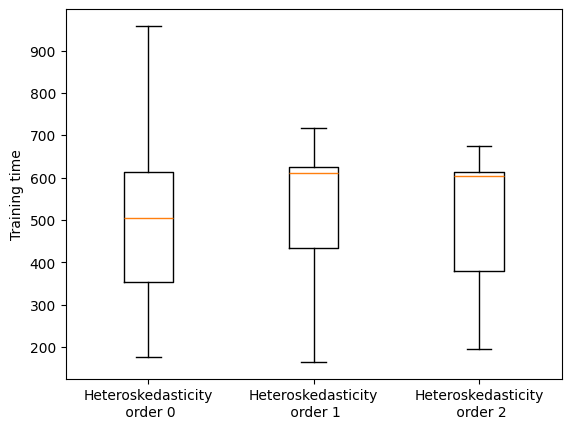

In [11]:
# Plot training times of linear Gaussian measurement processes with heteroskedasticity orders 0, 1, and 2
plt.boxplot(heteroskedasticity_training_times, labels = heteroskedasticity_training_times.columns)
plt.ylabel("Training time")
plt.show()

In [12]:
# Read in performances of linear Gaussian measurement processes with heteroskedasticity orders 0, 1, and 2
no_norm_seq_linear_Gaussian_0_performance = pd.read_table("no_norm_seq_train_rnacompete_2013_GE.py_linear_Gaussian_0_performance.tsv", index_col = "Experiment")
no_norm_seq_linear_Gaussian_0_performance.rename({"Pearson score": "Heteroskedasticity\n order 0"}, axis = 1, inplace = True)
no_norm_seq_linear_Gaussian_1_performance = pd.read_table("no_norm_seq_train_rnacompete_2013_GE.py_linear_Gaussian_1_performance.tsv", index_col = "Experiment")
no_norm_seq_linear_Gaussian_1_performance.rename({"Pearson score": "Heteroskedasticity\n order 1"}, axis = 1, inplace = True)
no_norm_seq_linear_Gaussian_2_performance = pd.read_table("no_norm_seq_train_rnacompete_2013_GE.py_linear_Gaussian_2_performance.tsv", index_col = "Experiment")
no_norm_seq_linear_Gaussian_2_performance.rename({"Pearson score": "Heteroskedasticity\n order 2"}, axis = 1, inplace = True)
heteroskedasticity_performances = no_norm_seq_linear_Gaussian_0_performance.merge(no_norm_seq_linear_Gaussian_1_performance, left_index = True, right_index = True)
heteroskedasticity_performances = heteroskedasticity_performances.merge(no_norm_seq_linear_Gaussian_2_performance, left_index = True, right_index = True)
heteroskedasticity_performances

Heteroskedasticity\n order 0  Heteroskedasticity\n order 1  \
Experiment                                                                
RNCMPT00100                        0.7224                        0.6397   
RNCMPT00101                        0.5800                        0.4321   
RNCMPT00102                        0.1043                        0.0824   
RNCMPT00103                        0.4230                       -0.4069   
RNCMPT00104                        0.3291                        0.2107   
...                                   ...                           ...   
RNCMPT00095                        0.1148                        0.1186   
RNCMPT00096                        0.5778                        0.5153   
RNCMPT00097                        0.6320                        0.5295   
RNCMPT00099                        0.7491                        0.6525   
RNCMPT00009                        0.5081                        0.5125   

             Heteroskedasticity\n order 2  
Experiment                                 
RNCMPT00100                        0.6578  
RNCMPT00101                        0.4272  
RNCMPT00102                        0.1067  
RNCMPT00103                        0.3781  
RNCMPT00104                        0.2335  
...                                   ...  
RNCMPT00095                        0.1083  
RNCMPT00096                        0.4850  
RNCMPT00097                        0.5452  
RNCMPT00099                        0.6102  
RNCMPT00009                        0.5104  

[244 rows x 3 columns]

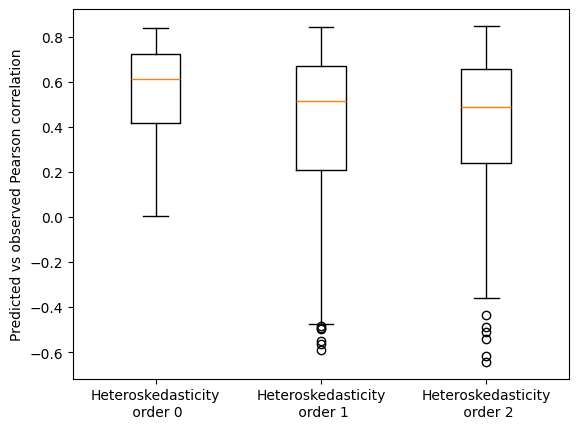

In [13]:
# Plot performances of linear Gaussian measurement processes with heteroskedasticity orders 0, 1, and 2
plt.boxplot(heteroskedasticity_performances, labels = heteroskedasticity_performances.columns)
plt.ylabel("Predicted vs observed Pearson correlation")
plt.show()

In [14]:
# Read in training times of linear measurement processes with Gaussian vs Cauchy vs skewed T noise (no heteroskedasticity)
no_norm_seq_linear_Gaussian_0_training_time = pd.read_table("no_norm_seq_train_rnacompete_2013_GE.py_linear_Gaussian_0_training_time.tsv", index_col = "Experiment")
no_norm_seq_linear_Gaussian_0_training_time.rename({"Training time": "Gaussian noise"}, axis = 1, inplace = True)
no_norm_seq_linear_Cauchy_0_training_time = pd.read_table("no_norm_seq_train_rnacompete_2013_GE.py_linear_Cauchy_0_training_time.tsv", index_col = "Experiment")
no_norm_seq_linear_Cauchy_0_training_time.rename({"Training time": "Cauchy noise"}, axis = 1, inplace = True)
no_norm_seq_linear_SkewedT_0_training_time = pd.read_table("no_norm_seq_train_rnacompete_2013_GE.py_linear_SkewedT_0_training_time.tsv", index_col = "Experiment")
no_norm_seq_linear_SkewedT_0_training_time.rename({"Training time": "SkewedT noise"}, axis = 1, inplace = True)
noise_distribution_training_times = no_norm_seq_linear_Gaussian_0_training_time.merge(no_norm_seq_linear_Cauchy_0_training_time, left_index = True, right_index = True)
noise_distribution_training_times = noise_distribution_training_times.merge(no_norm_seq_linear_SkewedT_0_training_time, left_index = True, right_index = True)
noise_distribution_training_times

Gaussian noise  Cauchy noise  SkewedT noise
Experiment                                              
RNCMPT00100        540.1270      707.0246       672.6472
RNCMPT00101        636.8994      877.6170       673.0798
RNCMPT00102        393.7725      643.0389       320.9525
RNCMPT00103        534.4518      615.8677       542.8457
RNCMPT00104        621.7416      785.0310       499.1533
...                     ...           ...            ...
RNCMPT00095        838.6332      486.7983       579.4297
RNCMPT00096        436.3951      375.9352       622.9053
RNCMPT00097        596.6411      599.5513       552.3495
RNCMPT00099        957.2006      622.6740       619.5035
RNCMPT00009        389.4892      348.7890       271.7824

[244 rows x 3 columns]

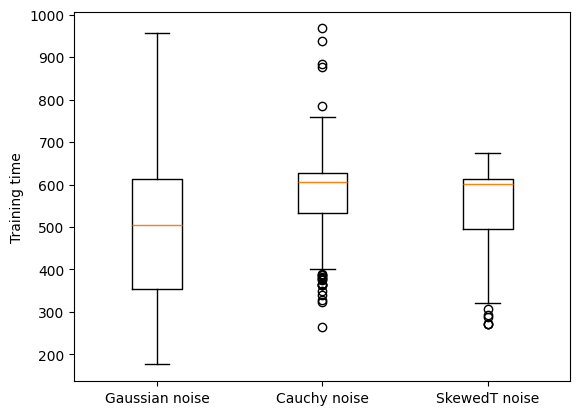

In [15]:
# Plot training times of linear measurement processes with Gaussian vs Cauchy noise (no heteroskedasticity)
plt.boxplot(noise_distribution_training_times, labels = noise_distribution_training_times.columns)
plt.ylabel("Training time")
plt.show()

In [16]:
# Read in performances of linear measurement processes with Gaussian vs Cauchy noise (no heteroskedasticity)
no_norm_seq_linear_Gaussian_0_performance = pd.read_table("no_norm_seq_train_rnacompete_2013_GE.py_linear_Gaussian_0_performance.tsv", index_col = "Experiment")
no_norm_seq_linear_Gaussian_0_performance.rename({"Pearson score": "Gaussian noise"}, axis = 1, inplace = True)
no_norm_seq_linear_Cauchy_0_performance = pd.read_table("no_norm_seq_train_rnacompete_2013_GE.py_linear_Cauchy_0_performance.tsv", index_col = "Experiment")
no_norm_seq_linear_Cauchy_0_performance.rename({"Pearson score": "Cauchy noise"}, axis = 1, inplace = True)
no_norm_seq_linear_SkewedT_0_performance = pd.read_table("no_norm_seq_train_rnacompete_2013_GE.py_linear_SkewedT_0_performance.tsv", index_col = "Experiment")
no_norm_seq_linear_SkewedT_0_performance.rename({"Pearson score": "SkewedT noise"}, axis = 1, inplace = True)
noise_distribution_performances = no_norm_seq_linear_Gaussian_0_performance.merge(no_norm_seq_linear_Cauchy_0_performance, left_index = True, right_index = True)
noise_distribution_performances = noise_distribution_performances.merge(no_norm_seq_linear_SkewedT_0_performance, left_index = True, right_index = True)
noise_distribution_performances

Gaussian noise  Cauchy noise  SkewedT noise
Experiment                                              
RNCMPT00100          0.7224        0.7252         0.6828
RNCMPT00101          0.5800        0.4546         0.3896
RNCMPT00102          0.1043        0.0368         0.0339
RNCMPT00103          0.4230        0.2284         0.3950
RNCMPT00104          0.3291        0.2299         0.2951
...                     ...           ...            ...
RNCMPT00095          0.1148        0.0855         0.0877
RNCMPT00096          0.5778        0.4050         0.4653
RNCMPT00097          0.6320        0.5913         0.5409
RNCMPT00099          0.7491        0.7212         0.6599
RNCMPT00009          0.5081        0.5124         0.5188

[244 rows x 3 columns]

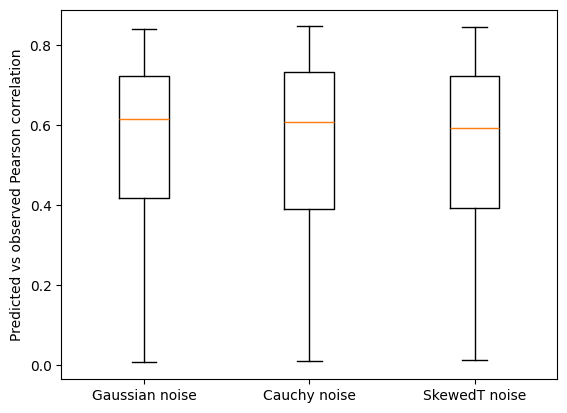

In [17]:
# Plot performances of linear measurement processes with Gaussian vs Cauchy noise (no heteroskedasticity)
plt.boxplot(noise_distribution_performances, labels = noise_distribution_performances.columns)
plt.ylabel("Predicted vs observed Pearson correlation")
plt.show()